# Clustering - Searching for Similar Groups

In [1]:
from time import time
import pandas as pd
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
matplotlib.style.use('classic')
%matplotlib inline 

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
filePath = "data\cfsShort.csv"
cfsShort = pd.read_csv(filePath, sep=',', index_col=0)
print len(cfsShort.index)
cfsShort.head()

2369579


,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,,,
4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1
7,19,99999,19-99999,19,99999,19-99999,337,3,26,5,43738,13501,16,22,N,N,N,N,310.5
9,19,99999,19-99999,19,99999,19-99999,327,3,31,5,338,12826,10,15,N,N,N,N,2695.9
10,13,99999,13-99999,13,99999,13-99999,4237,2,34,5,145,22,21,28,N,N,N,N,489.1


In [3]:
#Based on sklearns example for K-means clustering
def bench_cluster(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\n%.3f\n%.3f'
          % (name, (time() - t0), metrics.silhouette_score(data, estimator.labels_,)))

def plot_cluster_results(data, clusterModel):
    """Plots cluster results of clusterModel, with cluser centroids and decision bounaries,
    for first two components of PCA result of data"""
    
    reducedData = PCA(n_components=2).fit_transform(data)
    clusterModel.fit(reducedData)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reducedData[:, 0].min() - 1, reducedData[:, 0].max() + 1
    y_min, y_max = reducedData[:, 1].min() - 1, reducedData[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusterModel.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(1)
    plt.figure(figsize=(20,10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reducedData[:,0], reducedData[:,1], 'k.', markersize=2)
    
    #Not all clustering methods have the cluster_center_ attribute plot centers if possible
    try:
        centroids = clusterModel.cluster_centers_ 
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
    except Exception:
        pass

    plt.title('Clustering on the CFS dataset sample (PCA-reduced data)\n')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [4]:
selectFeats = ["SHIPMT_VALUE", "SHIPMT_WGHT", "SHIPMT_DIST_ROUTED"]
cfsShortClust = cfsShort[selectFeats]
cfsShortClustSamp = scale(cfsShortClust.sample(5000)) #Sample the data and standardize

In [5]:
#Evaluate 2 - 5 clusters with Kmeans
for i in range(2,10):
    print "For %d clusters" % i
    bench_cluster(KMeans(init='k-means++', n_clusters=i, n_init=10), name="K-Means++", data=cfsShortClustSamp)

For 2 clusters
K-Means++
0.047
0.585
For 3 clusters
K-Means++
0.036
0.584
For 4 clusters
K-Means++
0.036
0.579
For 5 clusters
K-Means++
0.061
0.586
For 6 clusters
K-Means++
0.064
0.588
For 7 clusters
K-Means++
0.123
0.566
For 8 clusters
K-Means++
0.120
0.570
For 9 clusters
K-Means++
0.160
0.580


It appears that two clusters provides the best score using the silhouette_score as the metric (best possible is 1). Lets use PCA to reduce the data to two components for visualization.

For 2 clusters


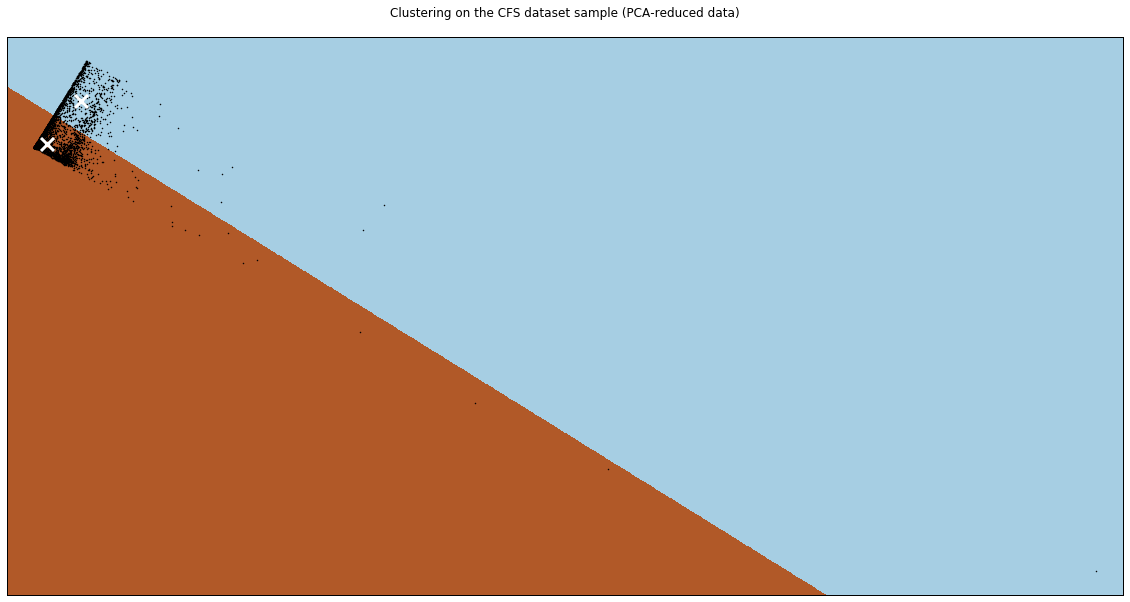

For 3 clusters


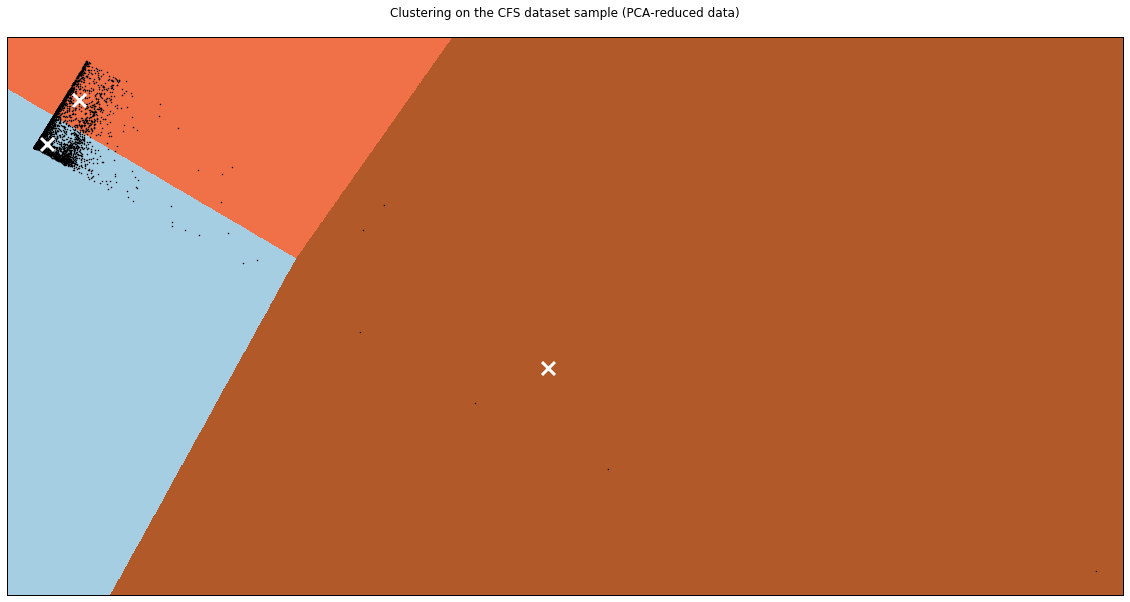

For 4 clusters


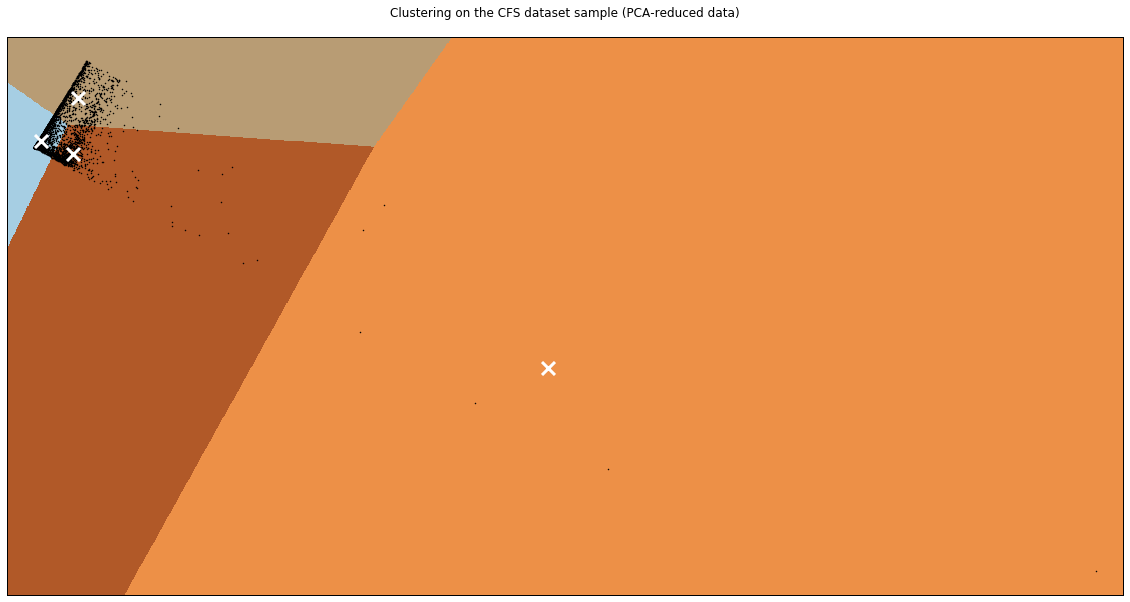

For 5 clusters


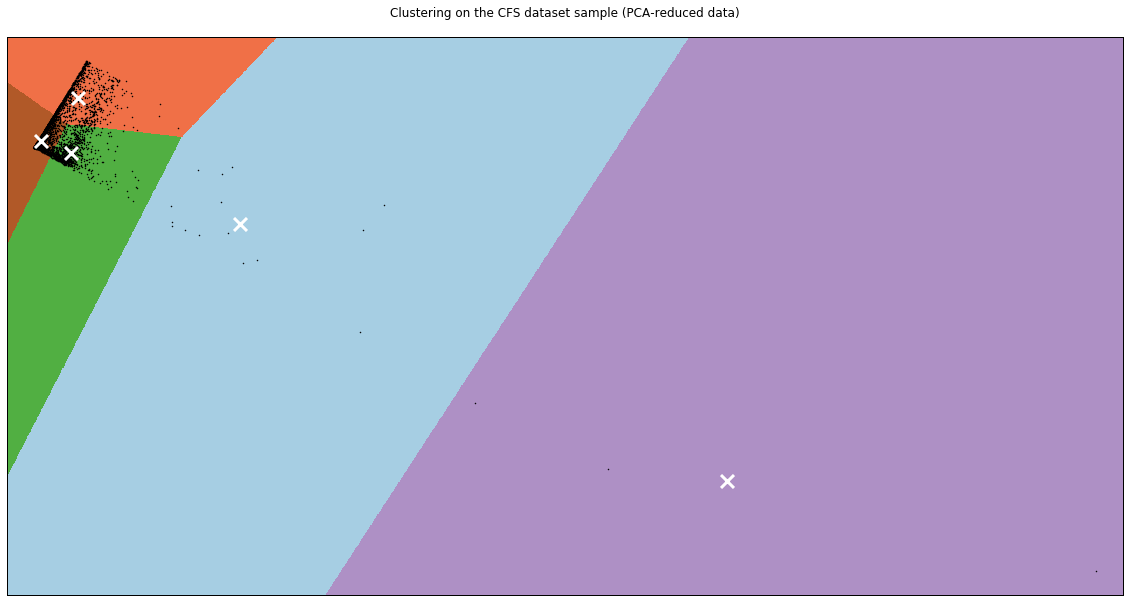

For 6 clusters


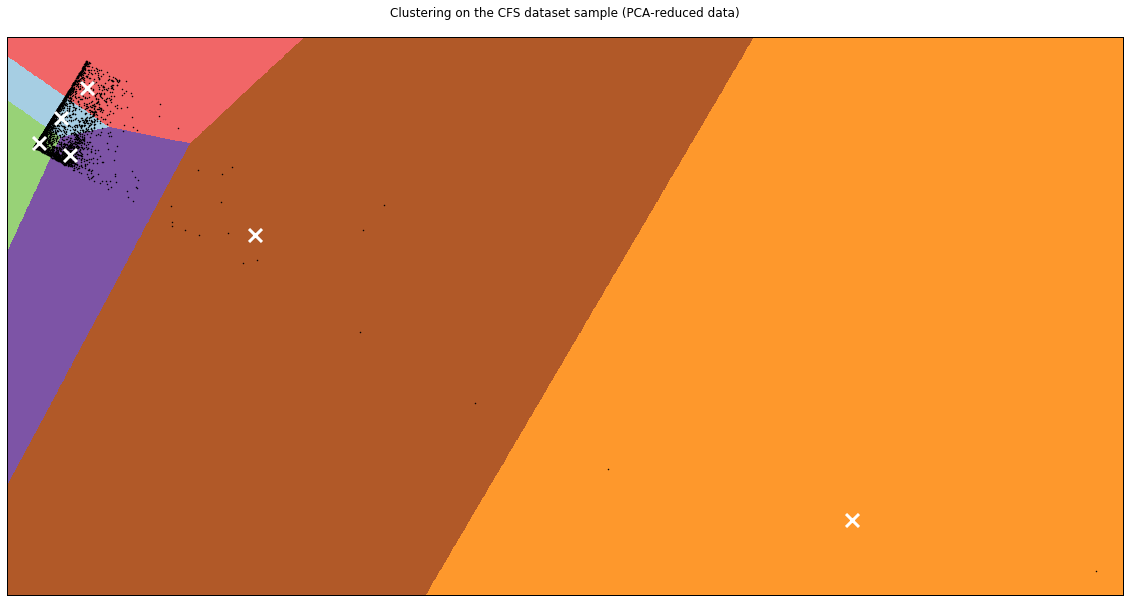

For 7 clusters


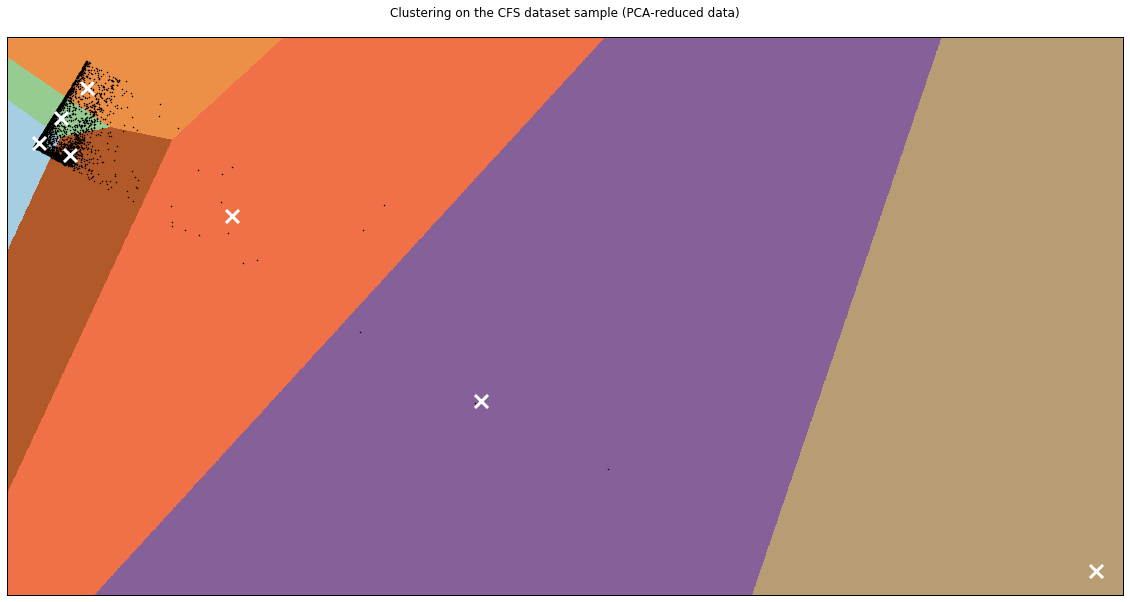

For 8 clusters


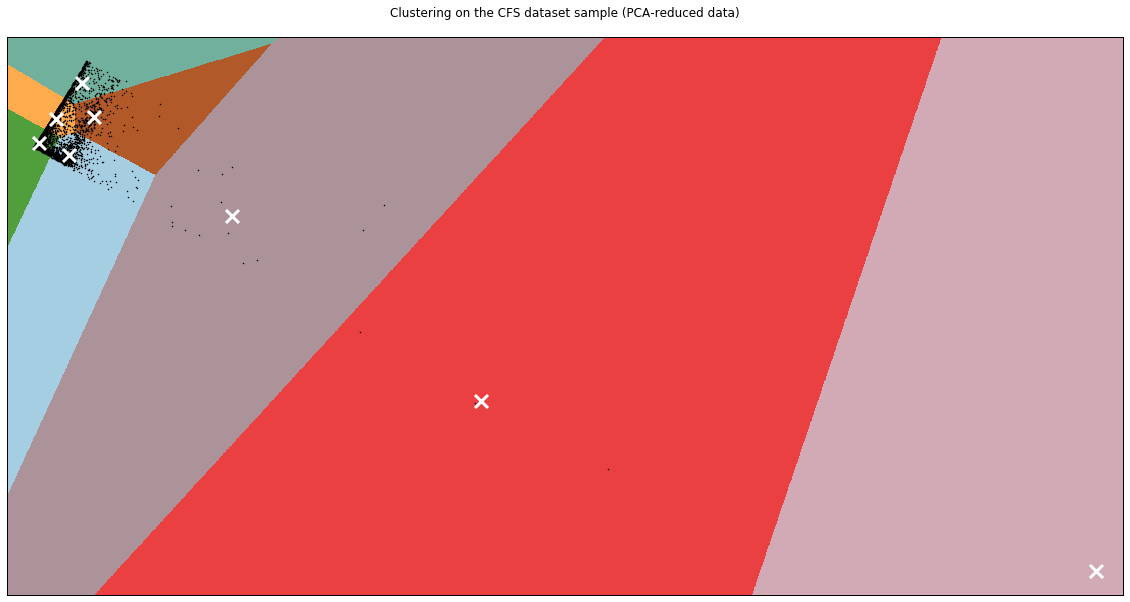

For 9 clusters


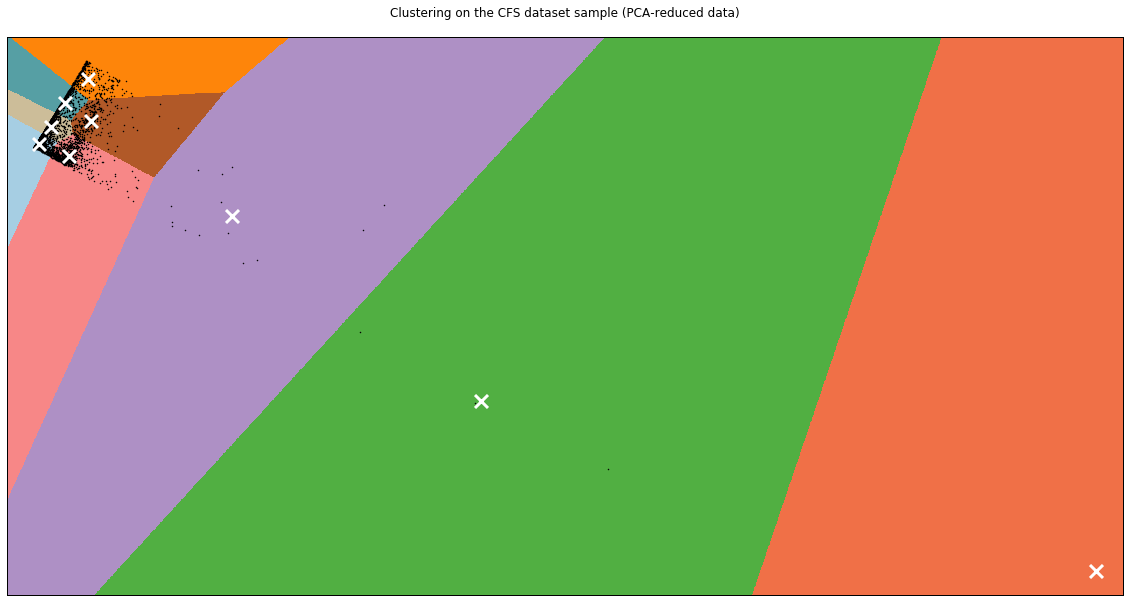

In [6]:
for i in range(2,10):
    print "For %d clusters" % i
    plot_cluster_results(cfsShortClustSamp, KMeans(init='k-means++', n_clusters=i, n_init=10))

It appears that outliers are making clustering with K-means difficult. Next a Birch clustering algorith will be evaluated.

In [7]:
#Evaluate 2 - 5 clusters with Kmeans
for i in range(2,10):
    print "For %d clusters" % i
    bench_cluster(Birch(threshold=1, branching_factor=50, n_clusters=i), name="Birch", data=cfsShortClustSamp)

For 2 clusters
Birch    
0.141
0.976
For 3 clusters
Birch    
0.073
0.951
For 4 clusters
Birch    
0.061
0.850
For 5 clusters
Birch    
0.062
0.850
For 6 clusters
Birch    
0.063
0.660
For 7 clusters
Birch    
0.060
0.660
For 8 clusters
Birch    
0.059
0.659
For 9 clusters
Birch    
0.059
0.660


For 2 clusters


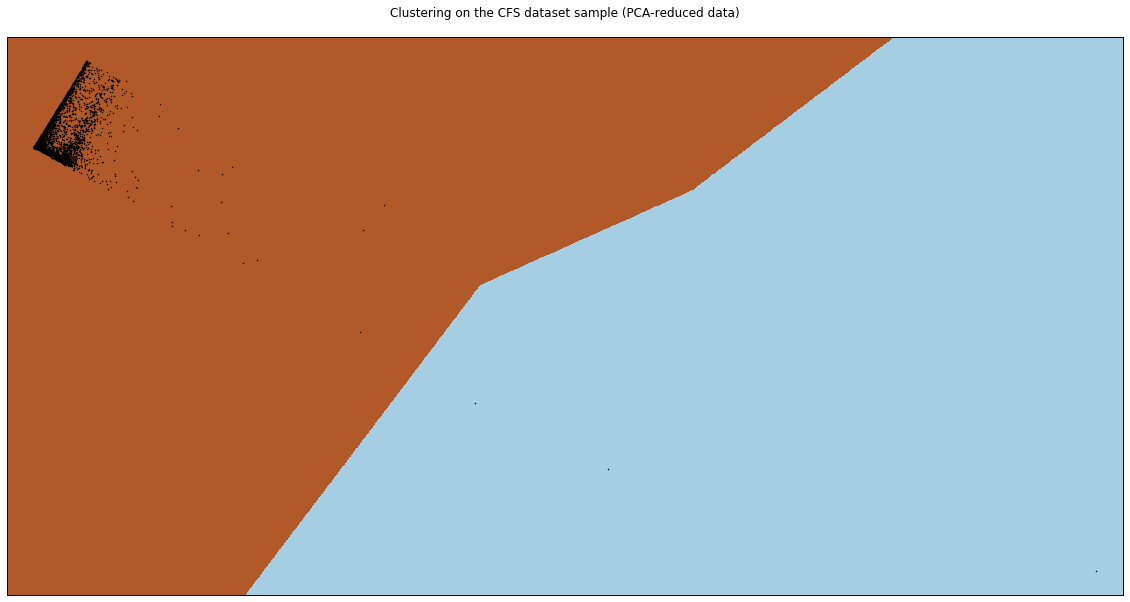

For 3 clusters


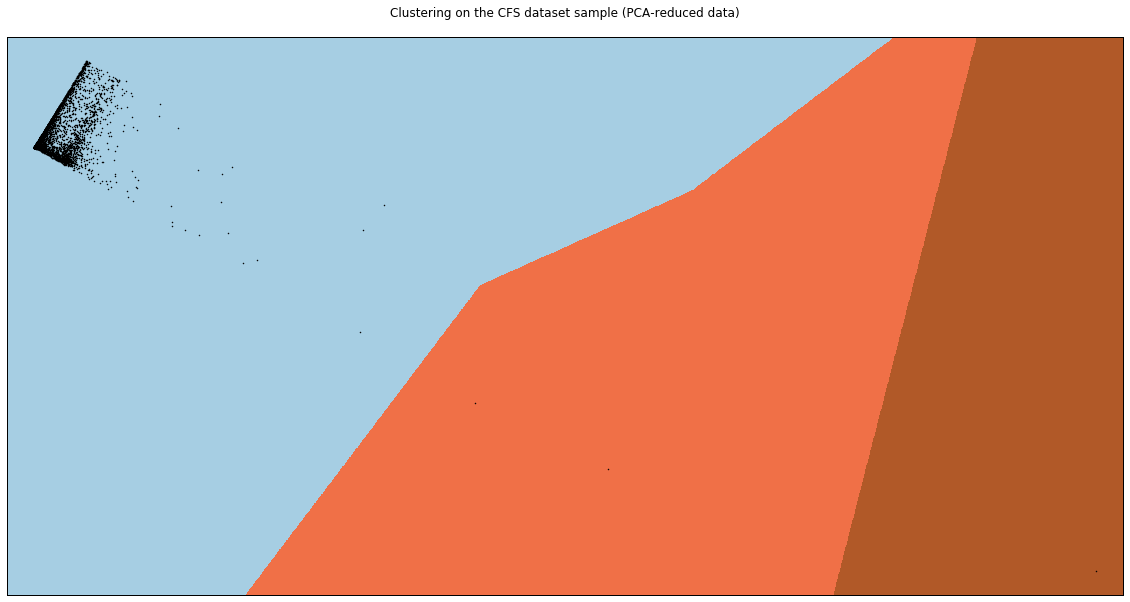

For 4 clusters


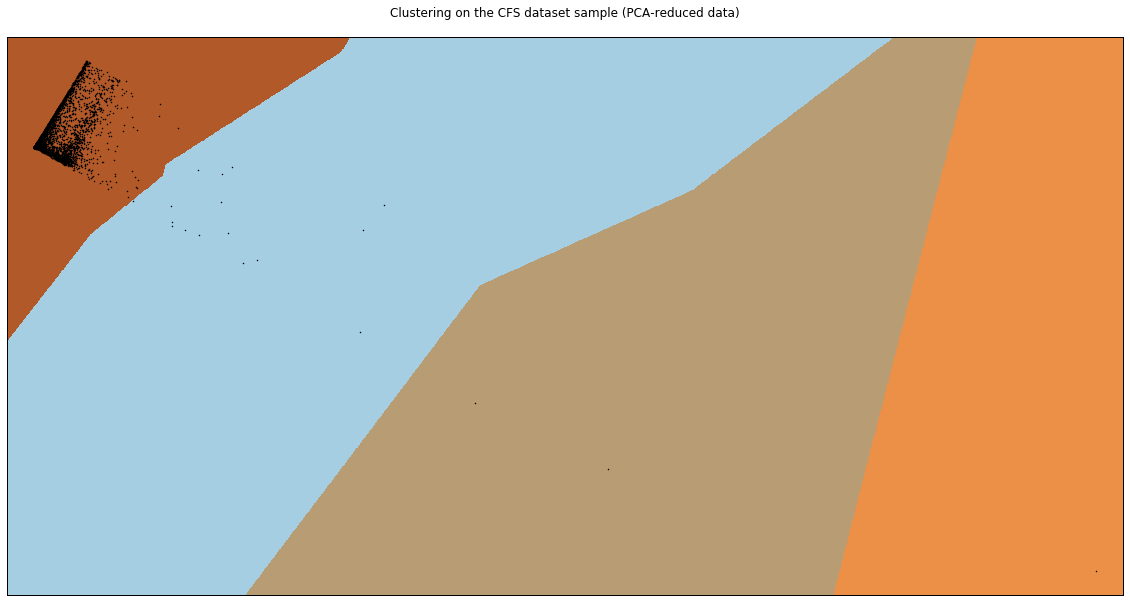

For 5 clusters


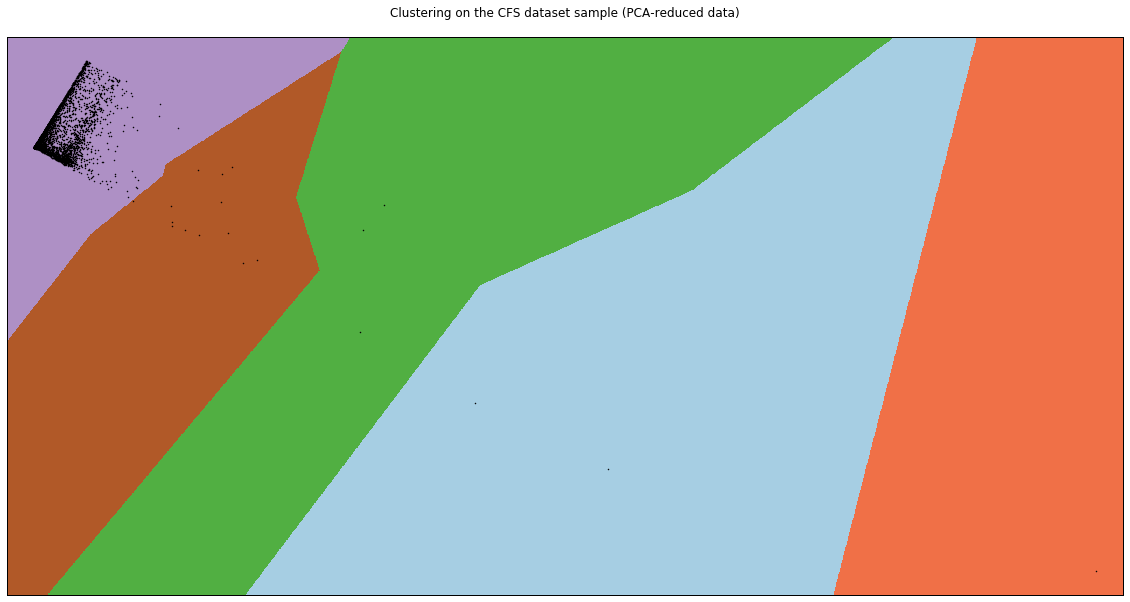

For 6 clusters


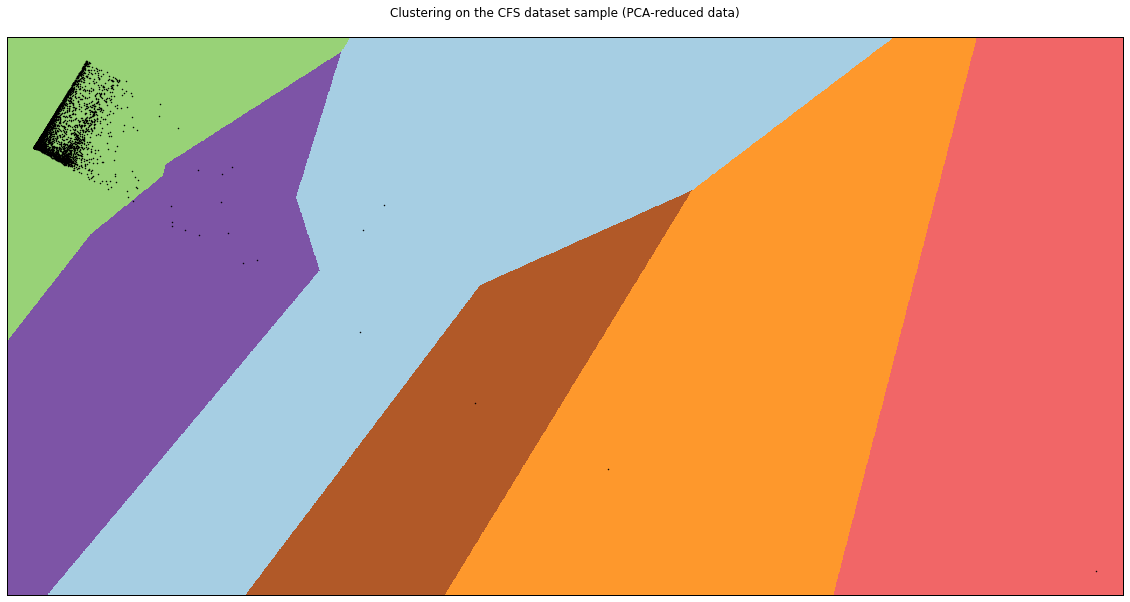

For 7 clusters


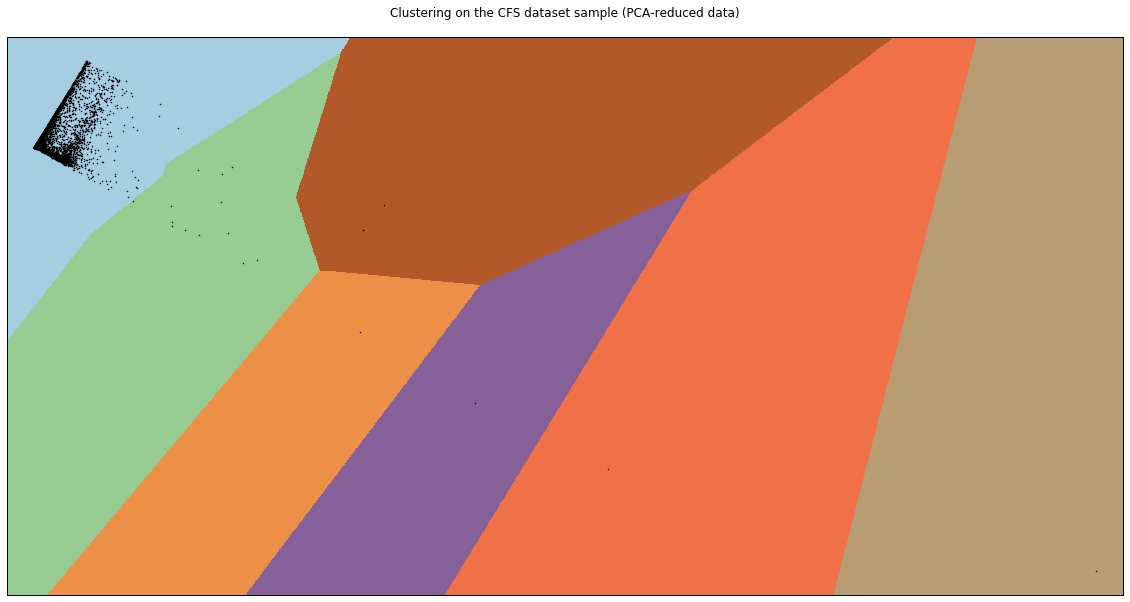

For 8 clusters


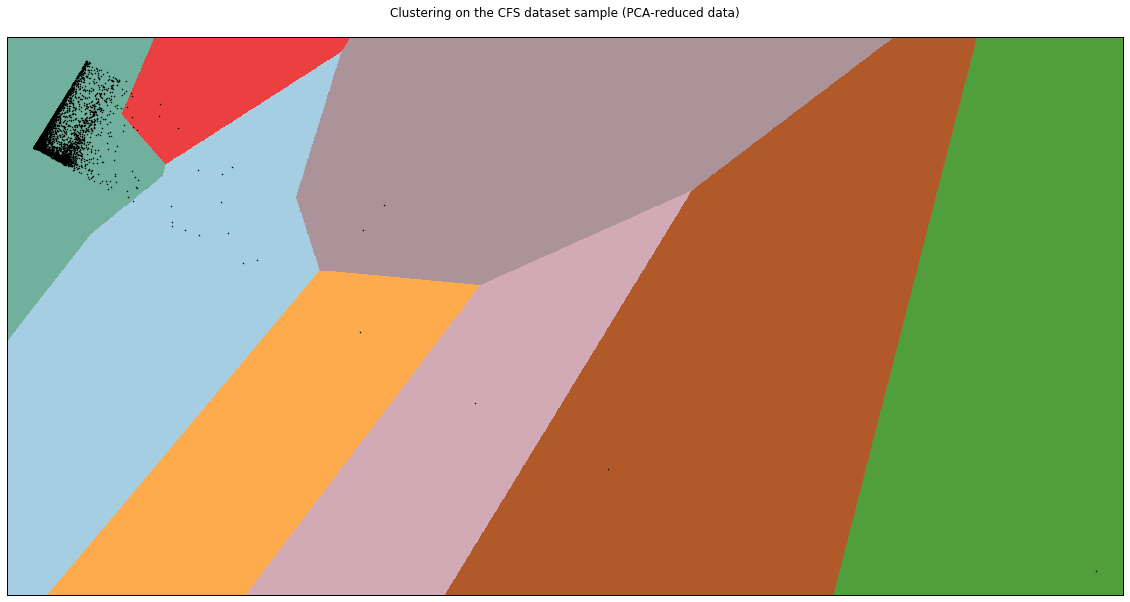

For 9 clusters


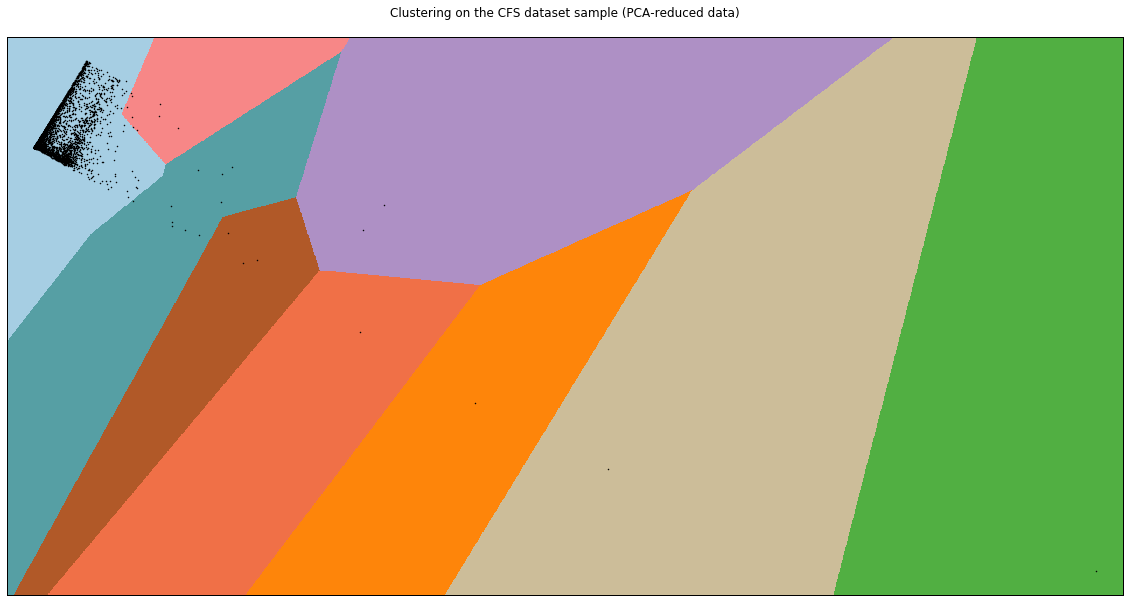

In [8]:
for i in range(2,10):
    print "For %d clusters" % i
    plot_cluster_results(cfsShortClustSamp, 
                         Birch(threshold=1, branching_factor=50, n_clusters=i))

It appears that one cluster has a distinct and tight grouping. A 4 cluster approach seems to provide a resonable grouping without overfitting.

### Cluser Group Inspection


In [36]:
clusterModel = Birch(threshold=1, branching_factor=50, n_clusters=4, compute_labels=True, copy=True)
cfsShortClustSample = cfsShortClust.sample(5000)
clusterModel.fit(scale(cfsShortClustSample)) #Standardize the sample for clustering
labels = clusterModel.labels_
clusterResults = pd.DataFrame([cfsShortClustSample.index, labels]).T
clusterResults = clusterResults.set_index([0])

In [43]:
labeled = pd.concat([cfsShort, clusterResults], axis=1, join_axes=None, join="inner")
labeled = labeled.rename(columns={1: "CLUSTER"})
labeled.head()

,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR,CLUSTER
2891394,29,312,29-312,20,312,20-312,321,3,26,5,29,11,13,16,N,N,N,N,110.2,0
1550468,54,99999,54-99999,54,99999,54-99999,4237,2,33,4,631,141,2,3,N,N,N,N,471.0,0
972829,39,99999,39-99999,39,99999,39-99999,4246,2,19,5,8,19,13,13,N,N,N,H,13242.5,0
542218,12,300,12-300,12,45300,12-45300,4231,4,36,4,277165,102039,182,210,N,Y,O,N,139.7,3
3967724,47,99999,47-99999,47,314,47-314,321,1,40,4,33387,45737,47,54,N,N,N,N,17.3,0


In [44]:
groupedClusters = labeled.groupby(["CLUSTER"])
groupedClusters.describe()[selectFeats]

SHIPMT_VALUE   SHIPMT_WGHT  SHIPMT_DIST_ROUTED
CLUSTER                                                       
0       count    4984.000000  4.984000e+03         4984.000000
        mean     7684.591894  1.313820e+04           59.467095
        std     19981.705486  2.394591e+04           72.196630
        min         1.000000  1.000000e+00            1.000000
        25%       213.750000  8.700000e+01           10.000000
        50%      1009.500000  1.032000e+03           25.000000
        75%      5530.500000  1.978650e+04           85.000000
        max    199376.000000  4.168190e+05          300.000000
1       count       2.000000  2.000000e+00            2.000000
        mean   235483.500000  4.144650e+06           40.000000
        std    150072.807705  3.403213e+05           33.941125
        min    129366.000000  3.904007e+06           16.000000
        25%    182424.750000  4.024329e+06           28.000000
        50%    235483.500000  4.144650e+06           40.000000
        75%    288542.250000  4.264972e+06           52.000000
        max    341601.000000  4.385294e+06           64.000000
2       count       3.000000  3.000000e+00            3.000000
        mean   584332.333333  2.566400e+04          101.333333
        std    113699.793906  2.500063e+04          133.417890
        min    508280.000000  7.000000e+00           15.000000
        25%    518979.000000  1.352000e+04           24.500000
        50%    529678.000000  2.703300e+04           34.000000
        75%    622358.500000  3.849250e+04          144.500000
        max    715039.000000  4.995200e+04          255.000000
3       count      11.000000  1.100000e+01           11.000000
        mean   268542.454545  3.111473e+04          195.181818
        std     43798.844282  2.762718e+04           80.810665
        min    224170.000000  2.238000e+03           22.000000
        25%    238829.000000  1.357700e+04          164.000000
        50%    244271.000000  2.598000e+04          210.000000
        75%    288924.500000  3.829450e+04          255.000000
        max    359073.000000  1.020390e+05          280.000000

#### How are these similar? What can be gleaned from this grouping regarding electric trucks?

One cluster contains an larger majority of data points in the sample as compared the other clusters, and these point represent lighter and less expensive shipments as compared to the other groups. An insight is that electric vehicles may be most benefitial if initially used for delivery of inexpensive light loads, leaving expensive and heavier loads to be moved by traditional means pending ubiquity of electric semi trucks.

Lets look at other features of the group.

In [45]:
#Import a the SCTG Codes representing types of goods moved.
goodCodes = pd.read_excel("data/cfs_2012_pum_file_users_guide_App_A (Jun 2015).xlsx", sheetname="App A3", header=1, index_col=0)
# goodCodes.head()

In [46]:
def pick_large_cluster(clusterGroupOb):
    """Returns the largest cluster from clusterGroupOb"""
    largeCluster = None
    tempLen = 0
    for group in clusterGroupOb.groups:
        if largeCluster == None:
            largeCluster = group
            tempLen = len(clusterGroupOb.get_group(group))
        elif len(clusterGroupOb.get_group(group)) > tempLen:
            largeCluster = group
            tempLen = len(clusterGroupOb.get_group(group))
    print "Largest Cluster: %s" % str(group)
    return largeCluster

def conv_SCTG(code):
    return goodCodes.loc[code]["Description"]

Largest Cluster: 3


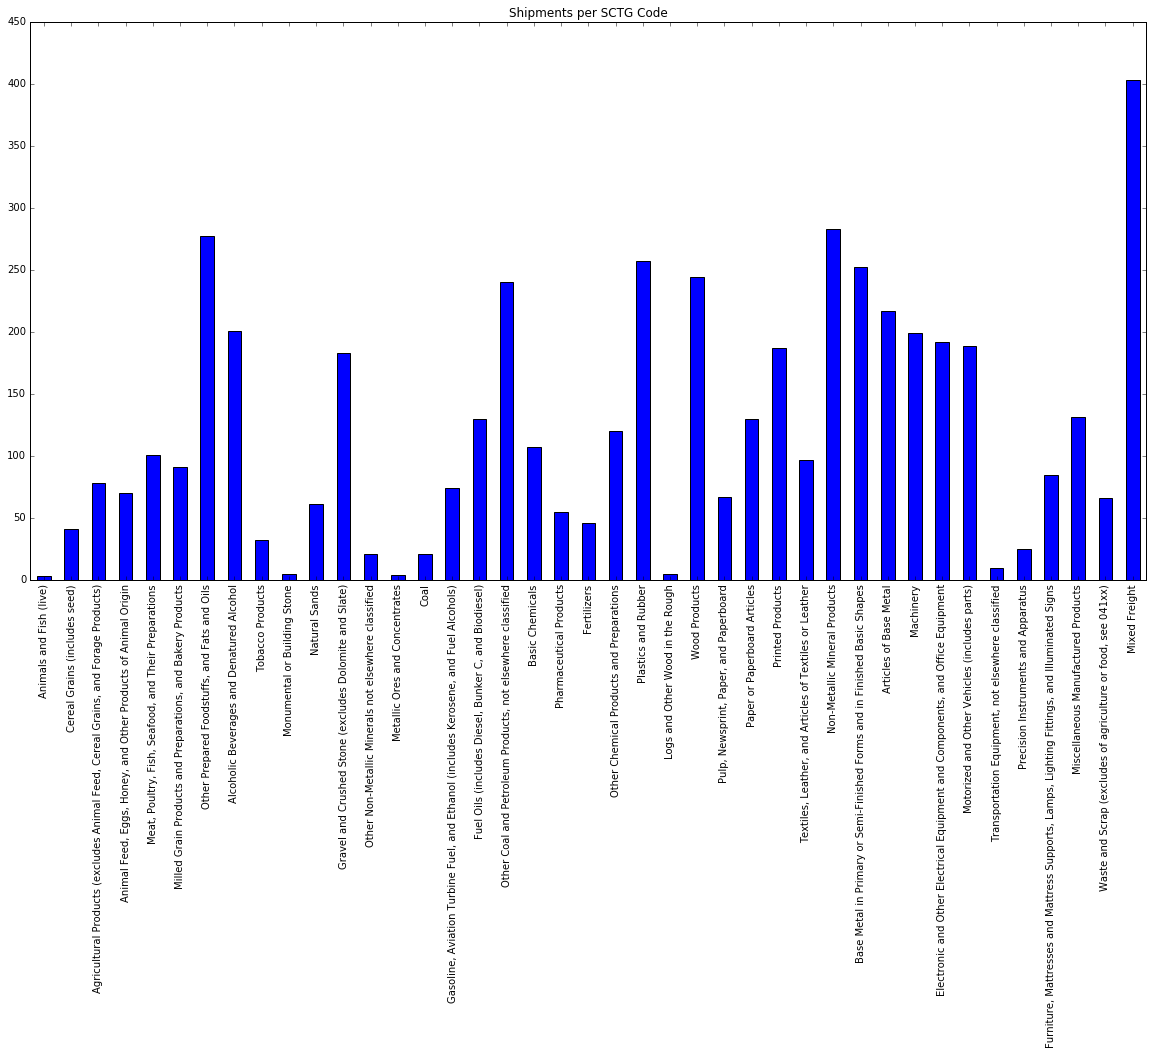

In [47]:
cluster = groupedClusters.get_group(pick_large_cluster(groupedClusters)) #Largest cluster from analysis above
clusterGroup = labeled.groupby(["SCTG"])
SCTGGroupsSize = clusterGroup.size()
SCTGGroupsSize.index = SCTGGroupsSize.index.map(conv_SCTG)
SCTGGroupsSize.plot.bar(figsize=(20,10), title="Shipments per SCTG Code")

#### What can be gleaned from this shipment class distribution regarding electric trucks?

Some materials have a very small representation in the cluster being inspected. These appear to be raw materials that may be part of heavy shipments shipped long distances for processing. The majority appears to be in mixed freight, which may be UPS/
FedEx type home and business deliveries.

In [48]:
# US FIPS Codes for States and Counties XLS File
USFIPS = pd.read_excel("data/US_FIPS_Codes.xls", 
                            skiprows=[0])
def conv_FIPS(code):
    return USFIPS.loc[USFIPS["FIPS State"] == code]["State"].head(1)

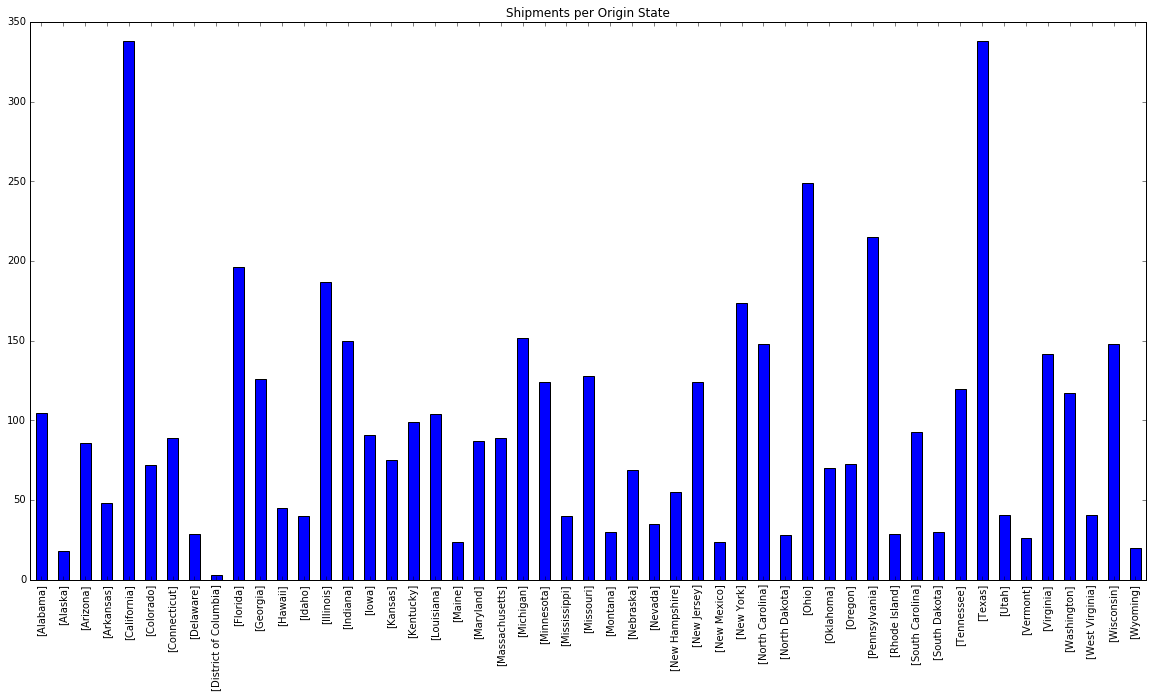

In [49]:
clusterGroup = cluster.groupby(["ORIG_STATE"])
OSGroupsSize = clusterGroup.size()
OSGroupsSize.index = OSGroupsSize.index.map(conv_FIPS)
OSGroupsSize.plot.bar(figsize=(20,10), title="Shipments per Origin State")

#### What can be gleaned from this shipment origin state distribution regarding electric trucks?

Not sure. The distribution appears to generally follow population values for each state, hence why Texas and California are the largest; not very insightful. 

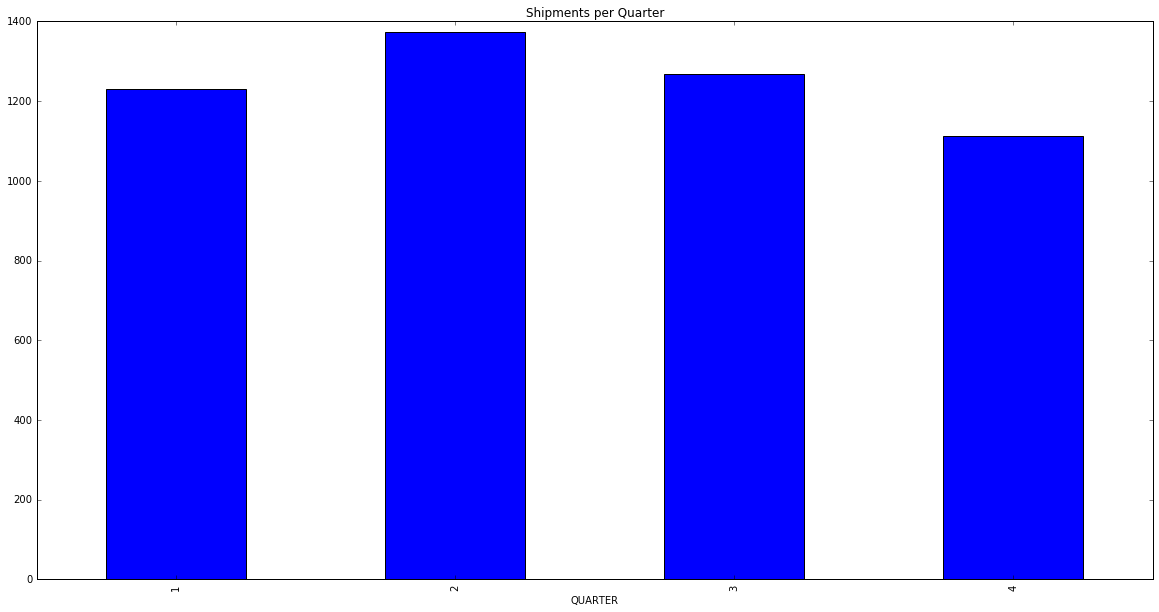

In [50]:
clusterGroup = cluster.groupby(["QUARTER"])
QtrGroupsSize = clusterGroup.size()
QtrGroupsSize.plot.bar(figsize=(20,10), title="Shipments per Quarter")

#### What can be gleaned from the shipment quarter regarding electric trucks?

Not sure. The distribution looks fairly even over the four quarters.

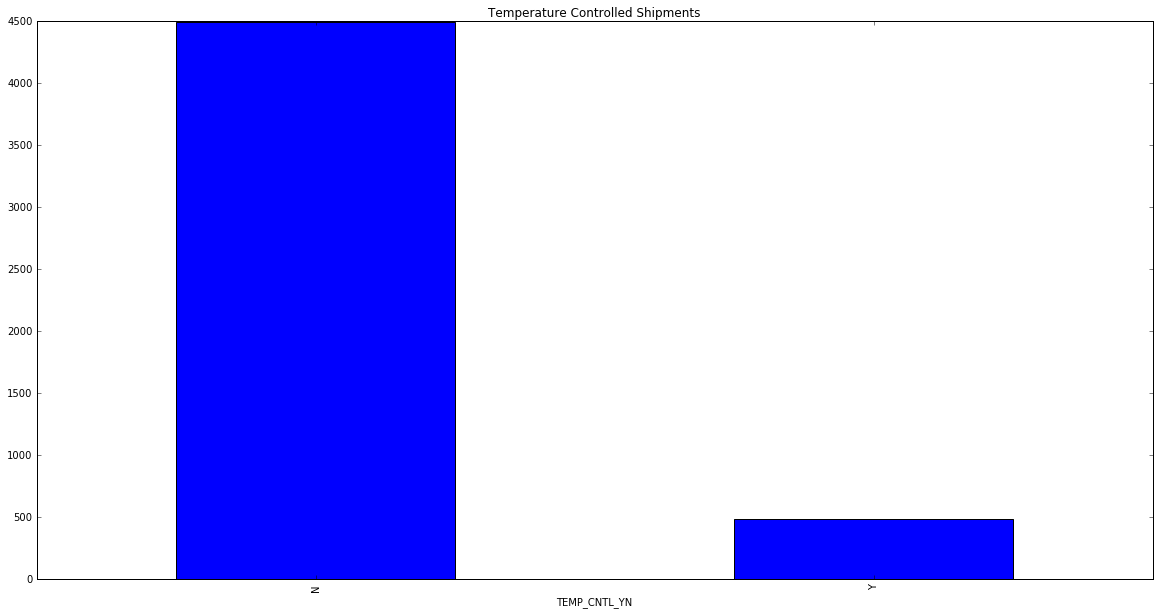

In [51]:
clusterGroup = cluster.groupby(["TEMP_CNTL_YN"])
TempGroupsSize = clusterGroup.size()
TempGroupsSize.plot.bar(figsize=(20,10), title="Temperature Controlled Shipments")

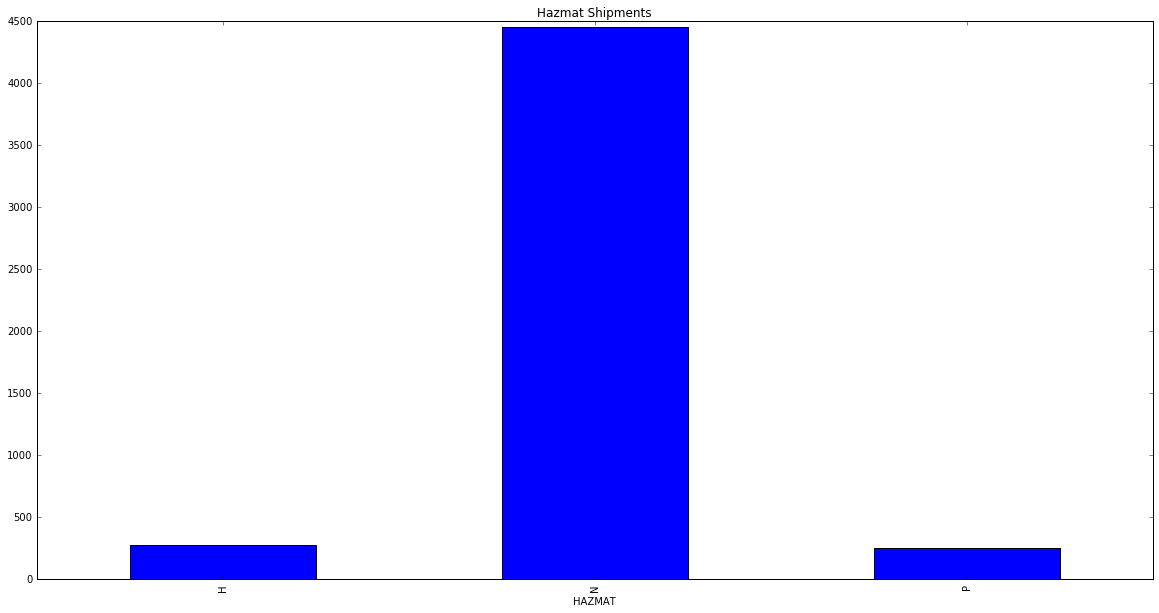

In [52]:
clusterGroup = cluster.groupby(["HAZMAT"])
HazGroupsSize = clusterGroup.size()
HazGroupsSize.plot.bar(figsize=(20,10), title="Hazmat Shipments")

#### What can be gleaned from review of Hazmat and tempurature controlled shipments?

Hazmat and temperature controlled shipments represent a very small portion of the deliveries. This is intuative, and may seem obvious, but confirms that electric trucks do not need temperature control or hazmat protection to be viable for most deliveries in the cluster.